In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join("..", "training"))
if module_path not in sys.path:
    sys.path.append(module_path)

from training import VideoCNN, train_video_processor

In [2]:
import argparse
import random
import matplotlib.pyplot as plt
import torch
import cv2
import pickle as pk
import numpy as np

In [19]:
def predict_example(model_path, example_path: str, verbose=False):
    """
    Load a pre-trained model and predict the class for a given example
    """
    # Load checkpoint
    checkpoint = torch.load(model_path, map_location="cpu")

    # Create model
    num_classes = checkpoint["num_classes"]
    model = VideoCNN(num_classes=num_classes)

    # Load model
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()

    # Add batch dimension
    example_video = torch.from_numpy(train_video_processor(example_path)).unsqueeze(0)

    # Predict
    with torch.no_grad():
        outputs = model(example_video)
        _, predicted = torch.max(outputs, 1)
        predicted_class = predicted.item()

    # Print results
    template_id = checkpoint["unique_templates"][predicted_class]
    if verbose:
        print(f"Model Path: {model_path}")
        print(f"Example Path: {example_path}")
        print(f"Predicted Label: {template_id}")

    return int(template_id)

def first_frame(video_path):
    cap = cv2.VideoCapture(video_path)

    # Check if the video was successfully opened
    if not cap.isOpened():
        raise Exception("Error: Could not open video.")
    else:
        # Read the first frame
        ret, frame = cap.read()
    cap.release()
    return frame

In [21]:
model = "../training/outputs/save_models/best_model_VideoCNN1_acc_94.pth"
exp = "/home/lehoangchibach/Documents/Code/gif_analytics/templates/template_examples/401357e57c765967393ba391a338e89b_424671631.gif"
predict_example(model, exp)

/tmp/ipykernel_478753/4150774999.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location="cpu")


424671631

In [12]:
examples = {}

with open("../training/data/data_sampled_threshold_10.pkl", "rb") as f:
    X_data, Y_data = pk.load(f)

# unique_Y = np.unique(Y_data)

for i, y in enumerate(Y_data):
    if y in examples:
        continue

    examples[y] = X_data[i]
    
    

In [13]:
reddit_path = "/d/gifs"
reddit_data = os.listdir(reddit_path)
reddit_data = [os.path.join(reddit_path, x) for x in reddit_data]

In [23]:
samples = random.sample(reddit_data, 10)

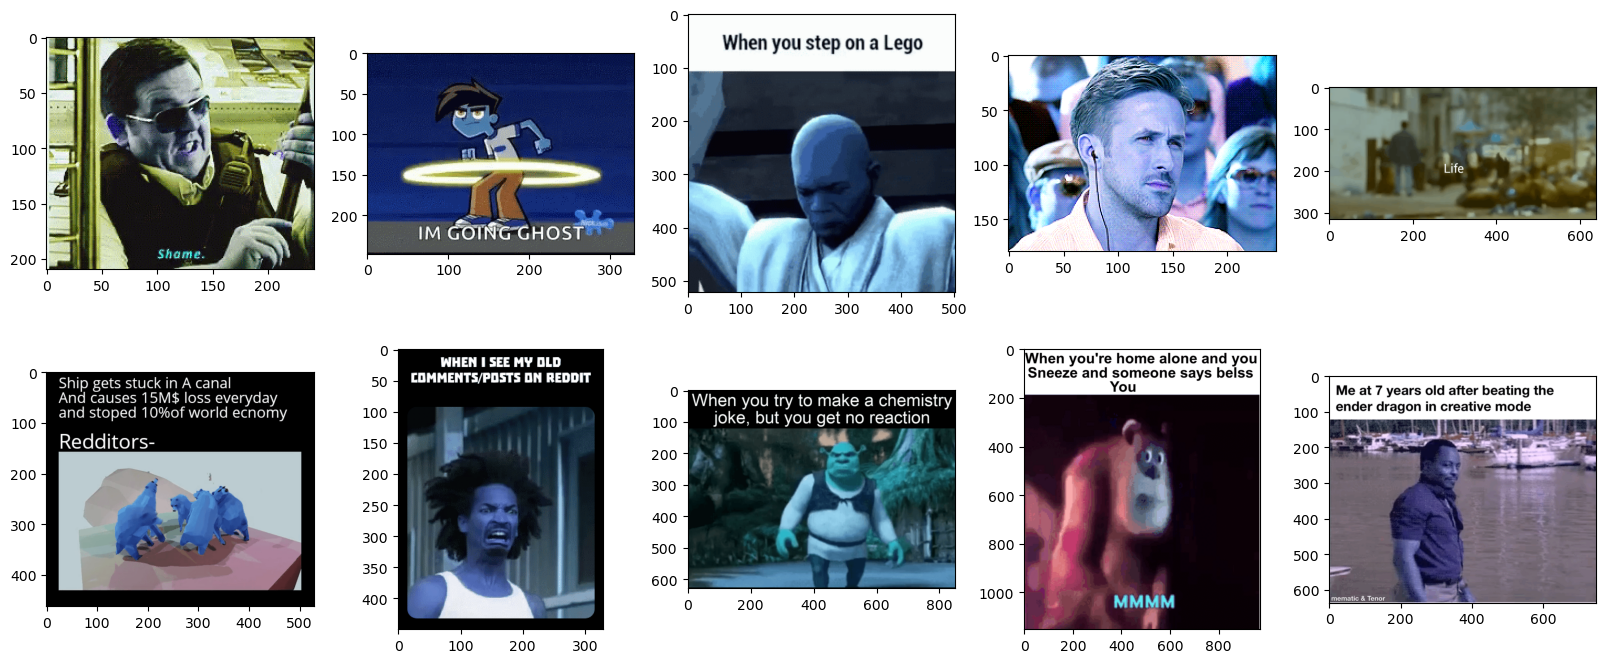

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flat):
    image = first_frame(samples[i])
    ax.imshow(image)

plt.show()

/tmp/ipykernel_478753/4150774999.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location="cpu")


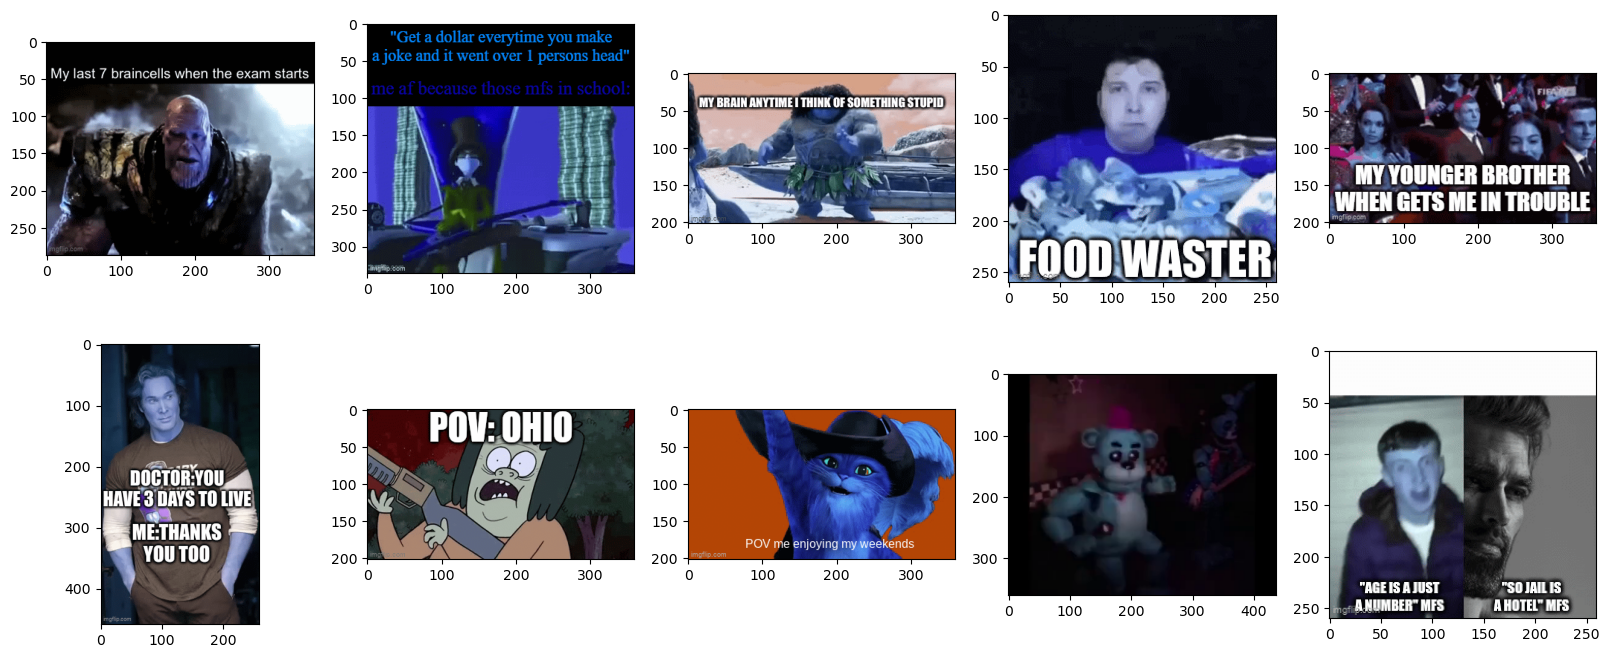

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flat):
    prediction = predict_example(model, samples[i])

    predict_meme = examples[prediction]
    image = first_frame(predict_meme)
    ax.imshow(image)

plt.show()